In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## 1.1 Just do one big experiment

In [21]:
 # First we'll generate the points we're interested in for many repeated experiments.
dimension = 2
n_experiments = 1
n_points_per_experiment = 10000
points = np.random.uniform(low=-1.0, high=1.0, size=(dimension, n_points_per_experiment, n_experiments, ))

In [3]:
# Next, check whether the points are in the circle
radius = (points**2).sum(axis=0)
inside_the_circle = (radius <= 1)
inside_the_square = ((-1.0 <= points[0]) & (points[0] <= 1.0) & (-1.0 <= points[1]) & (points[1] <= 1.0))
pi_by_4 = inside_the_circle.sum(axis=0) / inside_the_square.sum(axis=0)
pi = 4 * pi_by_4

In [4]:
average = pi.mean()
uncertainty = pi.std()
print(f'={average} ± {uncertainty}')

=3.16 ± 0.0


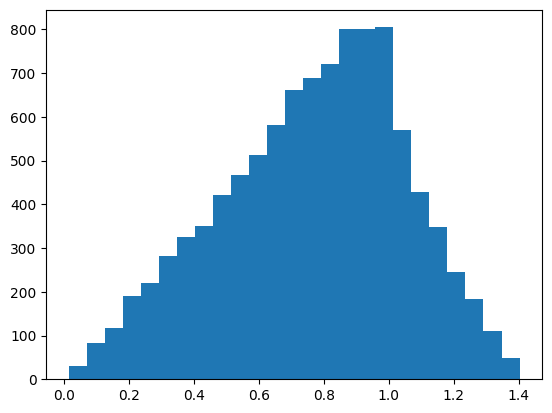

In [5]:
plt.hist(radius**0.5, bins=25)
plt.show()

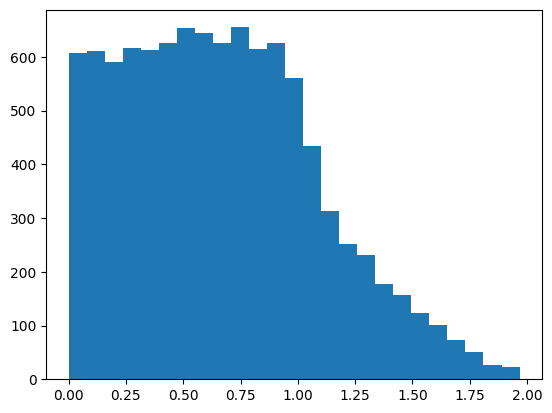

In [6]:
plt.hist(radius, bins=25)
plt.show()

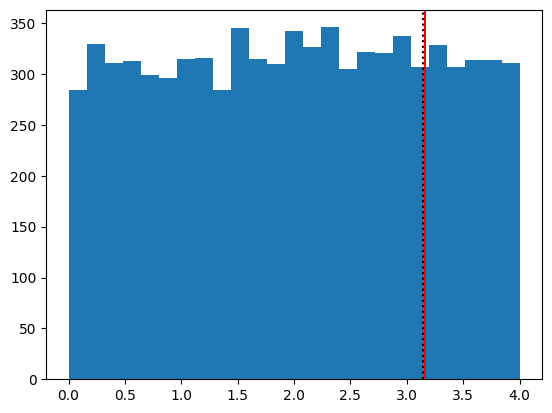

In [7]:
mask = radius <= 1
indicator = 4*radius[mask]

plt.hist(indicator, bins=25)
plt.axvline(np.pi, color='black', zorder=1, linestyle=':')
plt.axvline(average, color='red', zorder=1)
plt.axvspan(average-uncertainty, average+uncertainty, alpha=0.25)
plt.show()

## 1.2 Split into 100 experiments

In [8]:
def sample(n_experiments, n_points_per_experiment):
    points = np.random.uniform(low=-1.0, high=1.0, size=(dimension, n_points_per_experiment, n_experiments, ))
    return points

def find_pi(points):
    radius = (points**2).sum(axis=0)
    inside_the_circle = (radius <= 1)
    inside_the_square = ((-1.0 <= points[0]) & (points[0] <= 1.0) & (-1.0 <= points[1]) & (points[1] <= 1.0))
    pi_by_4 = inside_the_circle.sum(axis=0) / inside_the_square.sum(axis=0)
    pi = 4 * pi_by_4
    return pi

def estimate(pi, n_experiments):
    average = np.sum(pi)/(n_experiments-1)
    uncertainty = np.sqrt(np.sum(pi-average)**2/(n_experiments-1))
    return average, uncertainty

In [9]:
n_experiments_2 = 100
n_points_per_experiment_2 = 100

points_2 = sample(n_experiments_2, n_points_per_experiment_2)
pi_2 = find_pi(points_2)
average_2, uncertainty_2 = estimate(pi_2, n_experiments_2)
print(f'={average_2} ± {uncertainty_2}')

=3.158787878787879 ± 0.3174701268564285


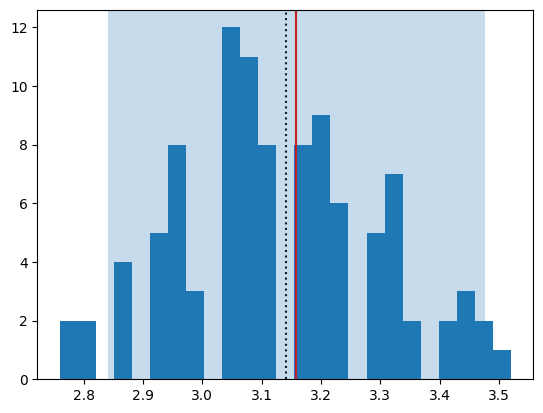

In [10]:
plt.hist(pi_2, bins=25)
plt.axvline(np.pi, color='black', zorder=1, linestyle=':')
plt.axvline(average_2, color='red', zorder=1)
plt.axvspan(average_2-uncertainty_2, average_2+uncertainty_2, alpha=0.25)

## 1.3 A Zillion Little Experiments

In [11]:
n_experiments_3 = 10000
n_points_per_experiment_3 = 1

points_3 = sample(n_experiments_3, n_points_per_experiment_3)
pi_3 = find_pi(points_3)
average_3, uncertainty_3 = estimate(pi_3, n_experiments_3)
print(f'={average_3} ± {uncertainty_3}')

=3.167916791679168 ± 0.031680751994008945


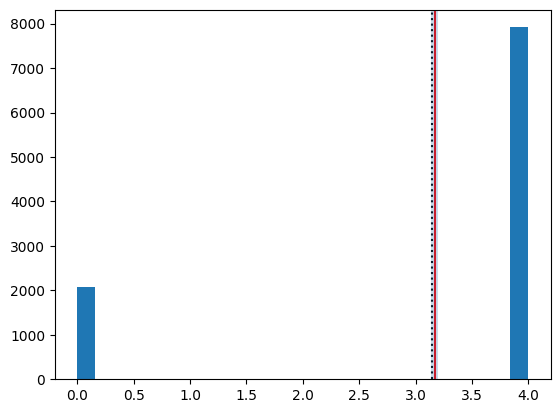

In [12]:
plt.hist(pi_3, bins=25)
plt.axvline(np.pi, color='black', zorder=1, linestyle=':')
plt.axvline(average_3, color='red', zorder=1)
plt.axvspan(average_3-uncertainty_3, average_3+uncertainty_3, alpha=0.25)

## 1.4 Stop and think

## 1.5 More Experiments vs. Longer Experiments

In [13]:
P = np.array([10, 100, 1000, 10000])
X = np.array([10, 100, 1000, 10000])
pi_estimates = np.zeros(16)
pi_uncertainties = np.zeros(16)
counter_1 = 0

for i in range(0, 4):
    counter_2 = 0
    for j in range(0, 4):
        sampled_data = sample(X[i], P[j])
        pi_value, uncertainty_value = estimate(find_pi(sampled_data), X[i])
        pi_estimates[counter_1 + counter_2] = pi_value
        pi_uncertainties[counter_1 + counter_2] = uncertainty_value
        counter_2 += 1
    counter_1 += 4

print("pi_estimates:", pi_estimates)
print("pi_uncertainties:", pi_uncertainties)


pi_estimates: [3.33333333 3.46222222 3.48       3.482      3.17171717 3.18020202
 3.17494949 3.17321616 3.15635636 3.15571572 3.14498899 3.14431431
 3.13523352 3.14172217 3.14217622 3.14206537]
pi_uncertainties: [1.11111111 1.15407407 1.16       1.16066667 0.31876957 0.31962233
 0.31909443 0.31892022 0.0998627  0.09984243 0.09950305 0.0994817
 0.0313539  0.03141879 0.03142333 0.03142222]


In [14]:
final_pi, final_uncertainty = estimate(pi_estimates, 16)
print(f'={final_pi} ± {final_uncertainty}')

=3.44134753727625 ± 0.8885521133588543


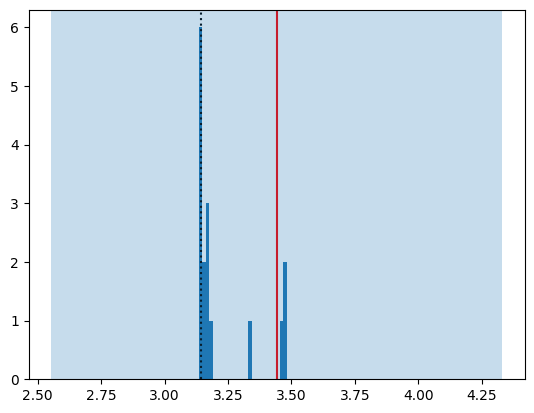

In [15]:
plt.hist(pi_estimates, bins=25)
plt.axvline(np.pi, color='black', zorder=1, linestyle=':')
plt.axvline(final_pi, color='red', zorder=1)
plt.axvspan(final_pi-final_uncertainty, final_pi+final_uncertainty, alpha=0.25)